## Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df= pd.read_csv("data/catA_train.csv")

Null Values in each column

In [3]:
df.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [5]:
print(len(df["AccountID"].unique()))
print(len(df["Company"].unique()))
print(len(df["Company Status (Active/Inactive)"].unique()))

29182
29182
1


In [6]:
print(len(df["8-Digit SIC Code"].unique()))
print(len(df["8-Digit SIC Description"].unique()))

2255
2191


As AccountID and Company are both unique, we will drop them.

As the Industry column is used to give information about the SIC Code, we will be dropping this column.

As the 8 Digit SIC Description is used to give information about the 8 Digit SIC Code, we will be dropping 8 Digit SIC Description column.

As company description is a qualitative description of each firm, we will be dropping this column.

As square footage has no values, we will be dropping this column.

As the values in the Company Status (Active/Inactive) columns are all active and there is only 1 unique value, there is no value add from this column, thus we will drop it.

As Employees (Single Site), Import/Export Status and Fiscal Year End has more than half its values missing, we would be dropping these columns.

In [7]:
df.drop("AccountID",inplace=True, axis=1)
df.drop("Company",inplace=True, axis=1)
df.drop("Industry",inplace=True, axis=1)
df.drop("8-Digit SIC Description",inplace=True, axis=1)
df.drop("Company Description",inplace=True, axis=1)
df.drop("Square Footage",inplace=True, axis=1)
df.drop("Company Status (Active/Inactive)",inplace=True, axis=1)
df.drop("Employees (Single Site)",inplace=True, axis=1)
df.drop("Import/Export Status",inplace=True, axis=1)
df.drop("Fiscal Year End",inplace=True, axis=1)

In [8]:
df

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,7361.0,73610000.0,2020.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,4449.0,44490000.0,2015.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,6719.0,67190000.0,1993.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,6719.0,67190000.0,2006.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,6719.0,67190000.0,2006.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,67199901.0,2009.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,6719.0,67190000.0,NaN,Independent,NaN,NaN,Private,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,6726.0,67269905.0,1991.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,6719.0,67190000.0,2018.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [9]:
df["SIC Code"] = df["SIC Code"].astype('category')
df["8-Digit SIC Code"] = df["8-Digit SIC Code"].astype('category')
df["Year Found"] = df["Year Found"].astype('float64')
df["Entity Type"] = df["Entity Type"].astype('category')
df["Parent Company"] = df["Parent Company"].astype('category')
df["Parent Country"] = df["Parent Country"].astype('category')
df["Ownership Type"] = df["Ownership Type"].astype('category')
df["Global Ultimate Company"] = df["Global Ultimate Company"].astype('category')
df["Global Ultimate Country"] = df["Global Ultimate Country"].astype('category')
df["Domestic Ultimate Company"] = df["Domestic Ultimate Company"].astype('category')
df["Is Domestic Ultimate"] = df["Is Domestic Ultimate"].astype('category')
df["Is Global Ultimate"] = df["Is Global Ultimate"].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   LATITUDE                             29062 non-null  float64 
 1   LONGITUDE                            29062 non-null  float64 
 2   SIC Code                             29182 non-null  category
 3   8-Digit SIC Code                     29182 non-null  category
 4   Year Found                           28748 non-null  float64 
 5   Entity Type                          29182 non-null  category
 6   Parent Company                       28668 non-null  category
 7   Parent Country                       28662 non-null  category
 8   Ownership Type                       29182 non-null  category
 9   Employees (Domestic Ultimate Total)  29103 non-null  float64 
 10  Employees (Global Ultimate Total)    26408 non-null  float64 
 11  Sales (Domestic

In [11]:
df["Employees (Domestic Ultimate Total)"].fillna(df["Employees (Domestic Ultimate Total)"].median(), inplace=True)
df["Employees (Global Ultimate Total)"].fillna(df["Employees (Global Ultimate Total)"].median(), inplace=True)
df["LATITUDE"].fillna(df["LATITUDE"].median(), inplace=True)
df["LONGITUDE"].fillna(df["LONGITUDE"].median(), inplace=True)
df["Year Found"].fillna(df["Year Found"].median(), inplace=True)
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28080 entries, 0 to 29181
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   LATITUDE                             28080 non-null  float64 
 1   LONGITUDE                            28080 non-null  float64 
 2   SIC Code                             28080 non-null  category
 3   8-Digit SIC Code                     28080 non-null  category
 4   Year Found                           28080 non-null  float64 
 5   Entity Type                          28080 non-null  category
 6   Parent Company                       28080 non-null  category
 7   Parent Country                       28080 non-null  category
 8   Ownership Type                       28080 non-null  category
 9   Employees (Domestic Ultimate Total)  28080 non-null  float64 
 10  Employees (Global Ultimate Total)    28080 non-null  float64 
 11  Sales (Domestic Ulti

## Data Exploration

In [12]:
df["Sales (Domestic Ultimate Total USD)"].describe()

count    2.808000e+04
mean     7.710287e+08
std      1.039157e+10
min     -1.502631e+08
25%      1.026308e+06
50%      2.677662e+06
75%      2.165912e+07
max      3.184764e+11
Name: Sales (Domestic Ultimate Total USD), dtype: float64

## Linear Regression

In [68]:
numerical_df = df.select_dtypes(include='float64')

In [89]:
filtered_df = numerical_df[numerical_df['Sales (Domestic Ultimate Total USD)'] <= 2.165912e+07]

In [105]:
X = filtered_df.drop('Sales (Domestic Ultimate Total USD)', axis=1)
X= X.drop('LATITUDE', axis=1)
X= X.drop('LONGITUDE', axis=1)
y = filtered_df['Sales (Domestic Ultimate Total USD)']

In [106]:
X

,Year Found,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Global Ultimate Total USD)
0,2020.0,25.0,15.0,4.637871e+06
2,1993.0,4.0,4.0,1.026308e+06
4,2006.0,4.0,4.0,4.322130e+05
5,1986.0,4.0,4.0,1.026308e+06
8,2013.0,15.0,15.0,6.725700e+09
...,...,...,...,...
29175,2009.0,10.0,10.0,4.404600e+05
29176,1996.0,100.0,4556.0,1.402050e+09
29177,2009.0,50.0,6615.0,2.943975e+09
29180,2018.0,4.0,4.0,1.026308e+06


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=100,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 23040556716160.137


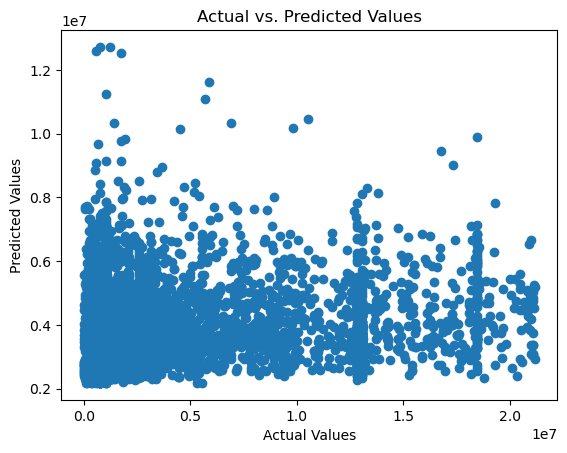

In [110]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [13]:
x_var = [x for x in df.columns if len(df[x].unique())<25]
x_var

['Entity Type', 'Ownership Type', 'Is Domestic Ultimate', 'Is Global Ultimate']

In [14]:
y = pd.DataFrame(df["Sales (Domestic Ultimate Total USD)"])
X = pd.DataFrame(df[['Entity Type', 'Ownership Type', 'Is Domestic Ultimate', 'Is Global Ultimate']])

In [15]:
X = pd.get_dummies(df[['Entity Type', 'Ownership Type', 'Is Domestic Ultimate', 'Is Global Ultimate']],drop_first=True, dtype= 'uint8')
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28080 entries, 0 to 29181
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Entity Type_Independent       28080 non-null  uint8
 1   Entity Type_Parent            28080 non-null  uint8
 2   Entity Type_Subsidiary        28080 non-null  uint8
 3   Ownership Type_Nonprofit      28080 non-null  uint8
 4   Ownership Type_Partnership    28080 non-null  uint8
 5   Ownership Type_Private        28080 non-null  uint8
 6   Ownership Type_Public         28080 non-null  uint8
 7   Ownership Type_Public Sector  28080 non-null  uint8
 8   Is Domestic Ultimate_1.0      28080 non-null  uint8
 9   Is Global Ultimate_1.0        28080 non-null  uint8
dtypes: uint8(10)
memory usage: 493.6 KB
None


In [16]:
X.head()

,Entity Type_Independent,Entity Type_Parent,Entity Type_Subsidiary,Ownership Type_Nonprofit,Ownership Type_Partnership,Ownership Type_Private,Ownership Type_Public,Ownership Type_Public Sector,Is Domestic Ultimate_1.0,Is Global Ultimate_1.0
0,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,1
5,0,0,1,0,0,1,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=100,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [32]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
X_train.shape

[[-0.0323377  -0.63641995  0.63855619 ... -0.04021251  0.96582575
  -0.60397448]
 [-0.0323377   1.57128952 -1.56603289 ... -0.04021251  0.96582575
   1.65569909]
 [-0.0323377  -0.63641995  0.63855619 ... -0.04021251  0.96582575
  -0.60397448]
 ...
 [-0.0323377  -0.63641995  0.63855619 ... -0.04021251 -1.03538345
  -0.60397448]
 [-0.0323377  -0.63641995  0.63855619 ... -0.04021251 -1.03538345
  -0.60397448]
 [-0.0323377  -0.63641995  0.63855619 ... -0.04021251 -1.03538345
  -0.60397448]]


(21060, 10)

In [33]:
y_train.head(10)

,Sales (Domestic Ultimate Total USD)
7629,4.119480e+06
27474,1.026308e+06
12025,6.111362e+06
5248,6.578040e+06
15265,8.151770e+07
26240,1.026308e+06
10356,2.781906e+09
24277,2.168284e+08
18095,2.522081e+09
13495,5.880700e+07


In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred)

[[5.88711810e+07]
 [2.75101537e+08]
 [5.88711810e+07]
 ...
 [1.35102595e+09]
 [2.75101537e+08]
 [1.35102595e+09]]


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.5229805088244377e+20


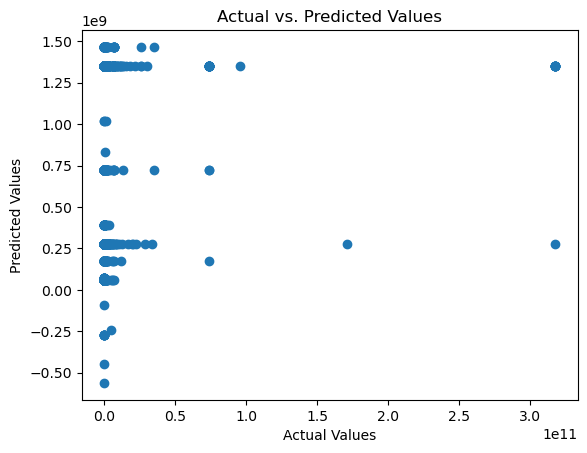

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

/Users/junrongng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.52293862843765e+20


In [28]:
y_pred = rforest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


Classification Accuracy 	: 0.0011396011396011395

Goodness of Fit of Model 	Test Dataset


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished


Classification Accuracy 	: 0.0002849002849002849



KeyboardInterrupt: 

Regression\
random forest\
decision trees (cart)\
neural networks

In [10]:
df.corr()

ValueError: could not convert string to float: 'LAKB2BID4559214'

In [17]:
categorical_features = [feature for feature in df.columns if len(df[feature].unique())<25]
categorical_features

['Entity Type',
 'Ownership Type',
 'Square Footage',
 'Company Status (Active/Inactive)',
 'Import/Export Status',
 'Is Domestic Ultimate',
 'Is Global Ultimate']

In [6]:
df_with_maker = df_cleaned[df_cleaned['Import/Export Status'].notna()]
print("N. rows with maker not null:", df_with_maker.shape[0])

df_no_maker = df_cleaned[df_cleaned['Import/Export Status'].isna()]
print("N. rows with maker null:", df_no_maker.shape[0])

N. rows with maker not null: 6613
N. rows with maker null: 22569


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Entity Type and number of categories are 4
The feature is Ownership Type and number of categories are 6
The feature is Square Footage and number of categories are 1
The feature is Company Status (Active/Inactive) and number of categories are 1
The feature is Import/Export Status and number of categories are 4
The feature is Is Domestic Ultimate and number of categories are 2
The feature is Is Global Ultimate and number of categories are 2


In [19]:
df[categorical_features].isnull().sum()

Entity Type                             0
Ownership Type                          0
Square Footage                      29182
Company Status (Active/Inactive)        0
Import/Export Status                22569
Is Domestic Ultimate                    0
Is Global Ultimate                      0
dtype: int64

In [20]:
missing_cf= ["Import/Export Status"]

In [21]:
df1 = df[missing_cf]
df1.head(10)

,Import/Export Status
0,NaN
1,NaN
2,NaN
3,NaN
4,Exports
5,NaN
6,Both Imports & Exports
7,NaN
8,NaN
9,NaN


In [24]:
df.interpolate()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.0,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2000.0,Independent,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,4.0,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0
